In [12]:
import pandas as pd

# Load the dataset into a DataFrame called 'df'
# Make sure to replace 'your_file_name.csv' with the actual name of your data file.
df = pd.read_csv('kc_house_data.csv')

In [13]:
# Display the data types of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [15]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [16]:
# Drop the columns, ignoring errors if they don't exist
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Display the statistical summary of the data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
# Count the number of houses with unique floor values
floor_counts = df['floors'].value_counts().to_frame()

# Display the resulting DataFrame
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


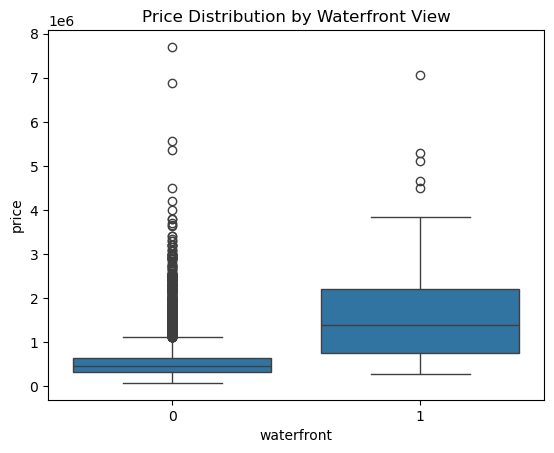

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot to compare prices by waterfront view
sns.boxplot(x="waterfront", y="price", data=df)

# Add a title for clarity
plt.title("Price Distribution by Waterfront View")

# Display the plot
plt.show()

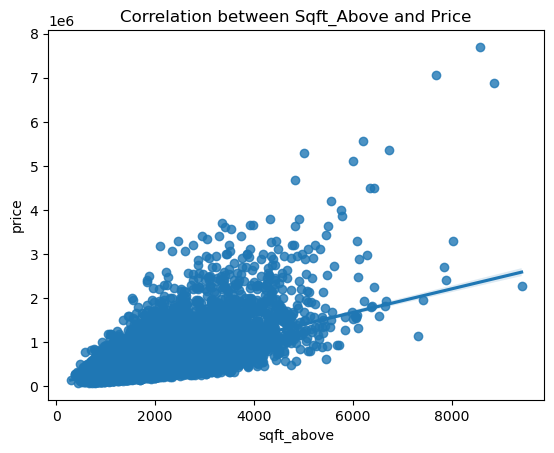

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the regression plot to determine the correlation
sns.regplot(x="sqft_above", y="price", data=df)

# Add a title for clarity
plt.title("Correlation between Sqft_Above and Price")

# Display the plot
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

# Define the feature (X) and the target (y)
X = df[['sqft_living']]
y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Calculate and print the R-squared value
r2_value = lm.score(X, y)
print(f"The R-squared value for the model is: {r2_value}")

The R-squared value for the model is: 0.4928532179037931


In [21]:
from sklearn.linear_model import LinearRegression

# Define the list of features to be used in the model
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define the feature set (X) and the target (y)
X = df[features]
y = df['price']

# Create and fit the multiple linear regression model
mlr = LinearRegression()
mlr.fit(X, y)

# Calculate and print the R-squared value
r2_value_mlr = mlr.score(X, y)
print(f"The R-squared value for the multiple regression model is: {r2_value_mlr}")

The R-squared value for the multiple regression model is: 0.657715105827932


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define the feature set (X) and the target (y)
X = df[features]
y = df['price']

# Create the list of steps for the pipeline
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), 
         ('model', LinearRegression())]

# Create the pipeline object
pipe = Pipeline(Input)

# Fit the pipeline to the data
pipe.fit(X, y)

# Calculate and print the R-squared value
r2_pipe = pipe.score(X, y)
print(f"The R-squared value for the pipeline model is: {r2_pipe}")

The R-squared value for the pipeline model is: 0.7513464430447871


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Define the features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Create and fit the Ridge regression model with alpha=0.1
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

# Calculate and print the R-squared value on the test data
r2_ridge = RidgeModel.score(x_test, y_test)
print(f"The R-squared value for the Ridge model on the test data is: {r2_ridge}")

The R-squared value for the Ridge model on the test data is: 0.6480374087702245


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Define the features and target (if not already defined)
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Create a second-degree polynomial features object
pr = PolynomialFeatures(degree=2)

# Fit and transform the training data
x_train_pr = pr.fit_transform(x_train)

# Only transform the test data
x_test_pr = pr.transform(x_test)

# Create a Ridge regression model
RidgeModel_poly = Ridge(alpha=0.1)

# Fit the model on the transformed training data
RidgeModel_poly.fit(x_train_pr, y_train)

# Calculate the R-squared on the transformed test data
r2_final = RidgeModel_poly.score(x_test_pr, y_test)
print(f"The R-squared value for the Polynomial Ridge model is: {r2_final}")

The R-squared value for the Polynomial Ridge model is: 0.7004432041260561
